In [39]:
# Imports necesarios
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
# Cargar los datos
df = pd.read_csv("car data.csv")
data = pd.read_csv("car data.csv")
data.shape

(301, 9)

Podemos identificar que el dataset cargado contiene 301 registros y 9 filas

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Se visualizan las primeras 5 filas del dataset.

In [41]:
# Separar variables independientes y dependiente
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner']]
y = df['Selling_Price']

Realizamos la separacion del conjunto de datos (variables independientes y dependientes para realizar las predccciones

In [26]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento (X_train, y_train): el 80% de los datos (por defecto) se usa para entrenar el modelo.

Prueba (X_test, y_test): el 20% restante se usa para evaluar cómo se comporta el modelo con datos que nunca ha visto.

In [29]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

 Creamos una instancia del modelo de regresión lineal usando la clase LinearRegression

In [42]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

Aqui entrenamos los datos  del modelo de regresion lineal usando los datos  de entrenamiento

In [31]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

Una vez entrenado los datos en la regresion lineal podemos realizar las predicciones

In [37]:
# Evaluar modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 4.1225600479315405
Coeficiente de determinación (R²): 0.8210351448082291


*Error Cuadrático Medio (MSE): 4.12 Este valor indica, en promedio, cuánto se equivoca el modelo al predecir el precio.

*Coeficiente de Determinación (R²): 0.82 Esto significa que el modelo explica el 82% de la variabilidad del precio de venta (Selling_Price) usando las variables independientes.

In [43]:
print("\nCoeficientes del modelo:")
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f"{nombre}: {coef:.2f}")


Coeficientes del modelo:
Year: 0.42
Present_Price: 0.52
Kms_Driven: -0.00
Owner: -1.14


Variable	Coeficiente	Interpretación Year	+0.42	Por cada año adicional (más nuevo), el precio de venta aumenta 0.42 unidades (en promedio), manteniendo las otras variables constantes.

Present_Price	+0.52	Por cada unidad más en el precio original del carro, el precio de venta aumenta aproximadamente 0.52 unidades.

Kms_Driven	-0.00	El kilometraje tiene un impacto muy bajo o casi nulo sobre el precio en este modelo.

Owner	-1.14	Tener más propietarios anteriores disminuye el valor del carro, en promedio, en 1.14 unidades por cada dueño adicional.

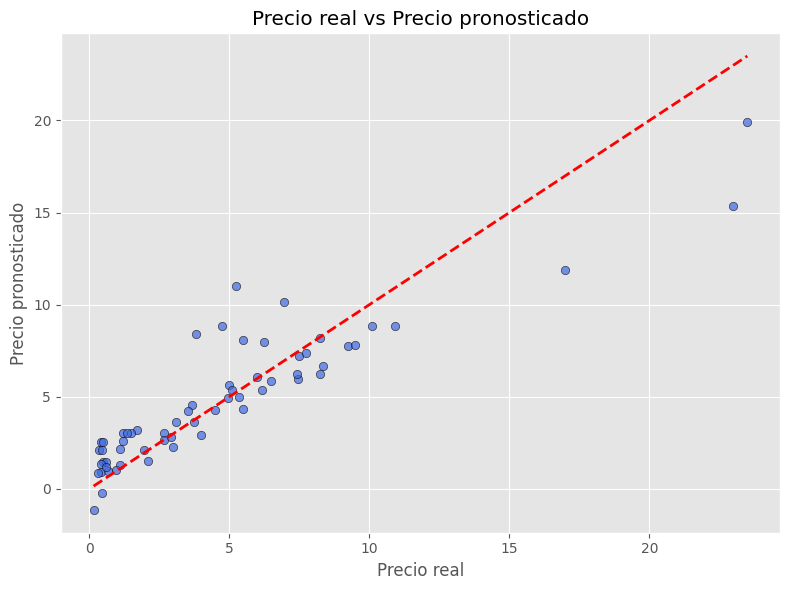

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio pronosticado")
plt.title("Precio real vs Precio pronosticado")
plt.grid(True)
plt.tight_layout()
plt.show()

Con esta grafica de dispercion se compara los precios reales vs los precios pronosticados en este modelo de regresion lineal.

Se puede observar que los puntos estan alineados a lo largo de la linea roja  segmentada, lo que nos indica que en general esta bien. Para los puntos que estan alejados no se predice bien para los automoviles costosos

Este modelo es preciso en cuanto  al rango de precios de los vehiculos bajo y medio.